# Milestones 1

---

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

Dataset yang digunakan dalam project ini adalah dataset penjualan sebuah supermarket dari January 2019 sampai Maret 2019. Dataset ini berisi 1000 baris dengan 13 kolom yang diantaranya adalah Invoice id, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax, Total, Date, Payment, COGS, Gross margin percentage, Gross income, dan Rating. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/aungpyaeap/supermarket-sales)

Keterangan pada kolom pada dataset ini adalah:

| Feature                 | Description                                                                                                                                                    |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Invoice id              | Computer generated sales slip invoice identification number                                                                                                    |
| Branch                  | Branch of supercenter (3 branches are available identified by A, B and C)                                                                                      |
| City                    | Location of supercenters                                                                                                                                       |
| Customer type           | Type of customers, recorded by Members for customers using member card and Normal for without member card                                                      |
| Gender                  | Gender type of customer                                                                                                                                        |
| Product line            | General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel |
| Unit price              | Price of each product in $                                                                                                                                     |
| Quantity                | Number of products purchased by customer                                                                                                                       |
| Tax                     | 5% tax fee for customer buying                                                                                                                                 |
| Total                   | Total price including tax                                                                                                                                      |
| Date                    | Date of purchase (Record available from January 2019 to March 2019)                                                                                            |
| Time                    | Purchase time (10am to 9pm)                                                                                                                                    |
| Payment                 | Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)                                                                |
| COGS                    | Cost of goods sold                                                                                                                                             |
| Gross margin percentage | Gross margin percentage                                                                                                                                        |
| Gross income            | Gross income                                                                                                                                                   |
| Rating                  | Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)        

### Objectives

Tujuan yang ingin dicapai pada project ini adalah:

- Mencari tahu kota manakah yang memiliki total pendapatan kotor paling besar.
- Melakukan uji hipotesis untuk mengetahui apakah rata-rata pendapatan kotor dari kota dengan pendapat kotor paling besar memiliki perbedaan signifikan dengan kota dengan pendapatan kotor paling kecil.

## Import Library

Mengimport semua library yang akan digunakan, dalam project ini menggunakan **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, dan **SciPy**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Loading

Membuat dataframe dari file `supermarket_sales-Sheet1.csv`.

In [2]:
sales = pd.read_csv('dataset/supermarket_sales-Sheet1.csv')

Menampilkan 5 baris teratas dari dataframe.

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Data Characteristics

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Dataset ini terdiri dari:
- 7 kolom dengan tipe data **float**
- 1 kolom dengan tipe data **integer**
- 9 kolom dengan tipe data **object**

Kolom `Date` dan `Time` nantinya akan digabungkan kedalam kolom baru bernama `datetime` yang bertipe **datetime**.

Dari sini juga dapat diketahui bahwa **tidak ada missing value** pada dataset.

In [5]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


Dapat diketahui beberapa kolom memiliki **distribusi normal** (symmetric distribution). Sebagai contoh kolom `Rating` memiliki distribusi normal karena mean pada kolom tersebut hampir sama.

## Data Preprocessing

### Column Rename

Pada bagian ini akan dilakukan perubahan nama kolom dataframe untuk memudahkan pemanggilan kolom.

In [6]:
old_names = list(sales.columns)
new_names = ['ID', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'price', 'quantity', 'tax', 'total', 'date', 'time', 'payment', 'cogs', 'margin_percentage', 'gross_income', 'rating']

Melakukan perubahan nama kolom dataframe.

In [7]:
sales = sales.rename(columns=dict(zip(old_names, new_names)))

Bentuk dataframe setelah dilakukan perubahan nama kolom.

In [8]:
sales.head()

,ID,branch,city,customer_type,gender,product_line,price,quantity,tax,total,date,time,payment,cogs,margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Add Column

Pada bagian ini akan membuat kolom baru yang bernama `datetime` yang menggabungkan kolom `date` dan `time`.

In [9]:
sales['datetime'] = sales.date + " " + sales.time

Bentuk dataframe setelah dilakukan penambahan kolom baru.

In [10]:
sales.head()

,ID,branch,city,customer_type,gender,product_line,price,quantity,tax,total,date,time,payment,cogs,margin_percentage,gross_income,rating,datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1/5/2019 13:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3/8/2019 10:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3/3/2019 13:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1/27/2019 20:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2/8/2019 10:37


### Column Drop

Pada bagian ini akan dilakukan penghapusan kolom `date` dan `time` karena sudah dibuat kolom baru bernama `datetime` dan kolom `branch` juga akan dihapus karena sudah direpresentasikan oleh kolom `city`.

In [11]:
sales = sales.drop(columns=['date', 'time', 'branch'])

Bentuk dataframe setelah dilakukan penghapusan kolom.

In [12]:
sales.head()

,ID,city,customer_type,gender,product_line,price,quantity,tax,total,payment,cogs,margin_percentage,gross_income,rating,datetime
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,1/5/2019 13:08
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,3/8/2019 10:29
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3/3/2019 13:23
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,1/27/2019 20:33
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2/8/2019 10:37


In [13]:
sales.shape

(1000, 15)

Setelah dilakukan penambahan dan penghapusan kolom sekarang dataframe memiliki **15** kolom.

### Convert Data Type

Pada bagian ini adalah menyimpan dataframe hasil preprocessing kedalam bentuk `.csv`.

In [14]:
sales.to_csv('dataset/cleandata.csv', index=False)

Pada bagian ini akan melakukan perubahan perubahan bentuk data dari kolom `datetime` menjadi **datetime**.

In [15]:
sales['datetime'] = pd.to_datetime(sales.datetime)

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 1000 non-null   object        
 1   city               1000 non-null   object        
 2   customer_type      1000 non-null   object        
 3   gender             1000 non-null   object        
 4   product_line       1000 non-null   object        
 5   price              1000 non-null   float64       
 6   quantity           1000 non-null   int64         
 7   tax                1000 non-null   float64       
 8   total              1000 non-null   float64       
 9   payment            1000 non-null   object        
 10  cogs               1000 non-null   float64       
 11  margin_percentage  1000 non-null   float64       
 12  gross_income       1000 non-null   float64       
 13  rating             1000 non-null   float64       
 14  datetime 

Dari info diatas dapat dilihat kolom `datetime` sekarang sudah berbentuk **datetime64[ns]**.

### Save Clean Data

## Data Exploration

Pada bagian **Data Exploration** ini akan dilakukan analisa untuk mengetahui kota mana yang memiliki total pendapatan kotor paling besar dan sedikit eksplorasi terkait kota tersebut.

### Super Market Exploration

Melakukan plotting untuk melihat rata-rata pendapatan kotor supermarket berdasarkan tanggal.

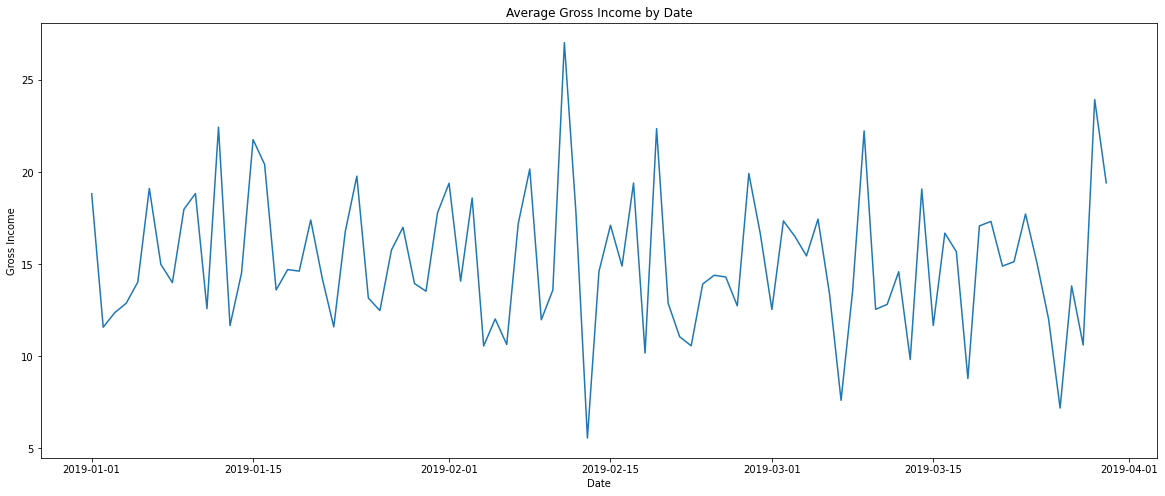

In [17]:
plt.figure(figsize=(20, 8))
plt.plot(sales.groupby(sales.datetime.dt.date).gross_income.mean())
plt.title('Average Gross Income by Date')
plt.xlabel('Date')
plt.ylabel('Gross Income')
plt.show()

Dari grafik diatas dapat dilihat setelah satu bulan tidak mengalami perubahan yang signifikan pada pertengahan bulan februari pendapatan rata-rata supermarket mengalami kenaikan yang cukup tinggi dan kembali menjadi datar selama beberapa saat kemudian pada akhir bulan maret rata-rata pendapatan supermarket kembali menunjukan adanya kenaikan.

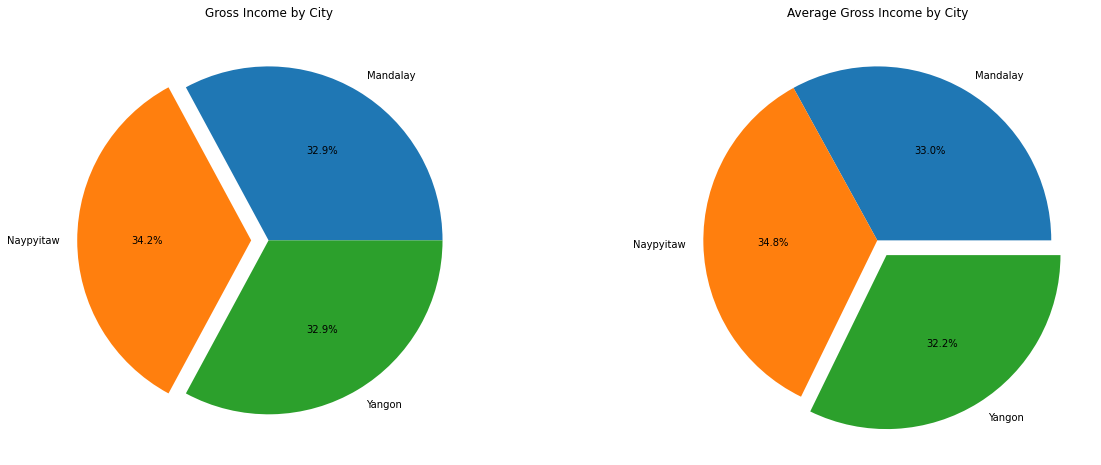

In [18]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie(sales.groupby('city').gross_income.sum(), labels=sales.groupby('city').gross_income.sum().index, autopct='%1.1f%%', explode=(0, 0.1, 0))
plt.title('Gross Income by City')
plt.subplot(1, 2, 2)
plt.pie(sales.groupby('city').gross_income.mean(), labels=sales.groupby('city').gross_income.mean().index, autopct='%1.1f%%', explode=(0, 0, 0.1))
plt.title('Average Gross Income by City')
plt.show()

Dari pie plot diatas dapat dilihat kota **Naypyitaw** adalah kota dengan pendapatan kotor paling besar baik dalam total atau rata-rata pendapatannya. Sedangkan kota **Yangon** adalah kota dengan dengan pendapatan kotor paling kecil berdasarkan rata-rata pendapatannya.

### Naypyitaw Exploration

Karena kota Naypyitaw adalah kota dengan **pendapatan kotor paling besar**, maka akan dilakukan sedikit explorasi data yang berkaitan dengan kota Naypyitaw ini.

Berikut adalah sedikit sales **overview** dari kota **Naypyitaw**.

In [19]:
data = {'Total Invoice': sales[sales.city == 'Naypyitaw'].ID.count(), 'Total Item Sold': sales[sales.city == 'Naypyitaw'].quantity.sum(), 'Total Purchased Amount': round(sales[sales.city == 'Naypyitaw'].total.sum()), 'Total Gross Income': round(sales[sales.city == 'Naypyitaw'].gross_income.sum()), 'Average Rating': round(sales[sales.city == 'Naypyitaw'].rating.mean(), 2)}
overview = pd.DataFrame(data, index=[''])
overview

,Total Invoice,Total Item Sold,Total Purchased Amount,Total Gross Income,Average Rating
,328,1831,110569,5265,7.07


Dari overview selama 3 bulan ini dapat diketahui supermarket di Naypyitaw ini memiliki:
- Jumlah invoice sebanyak **328** invoice
- Jumlah barang terjual sebanyak **1831** item
- Jumlah total yang dibeli sebesar **$110569**
- Jumlah pedapatan kotor sebesar **$5265**
- Rata-rata rating yang diberikan pengunjung sebesar **7.07 / 10**

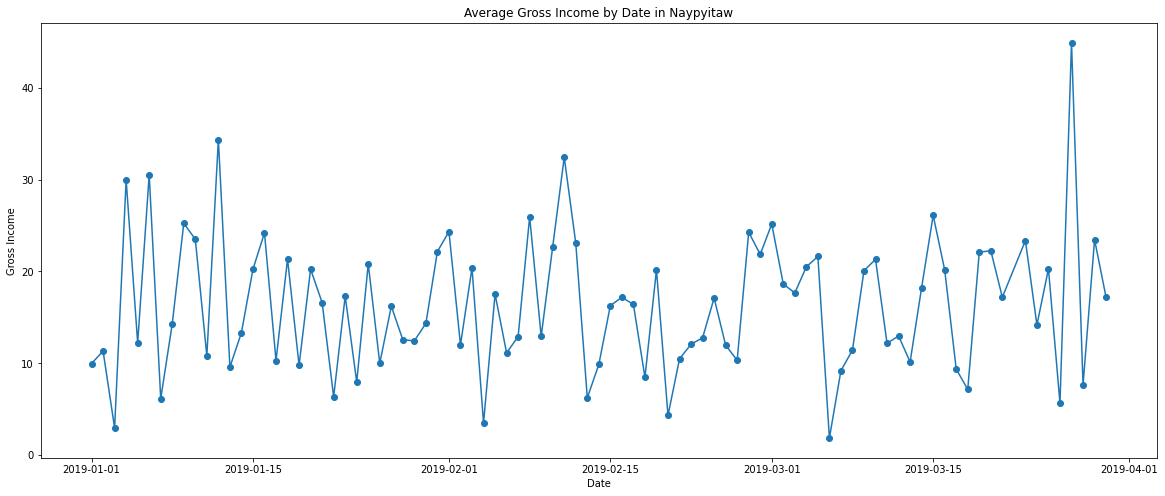

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(sales[sales.city == 'Naypyitaw'].groupby(sales.datetime.dt.date).gross_income.mean(), marker='o')
plt.title('Average Gross Income by Date in Naypyitaw')
plt.xlabel('Date')
plt.ylabel('Gross Income')
plt.show()

Rata-rata pendapatan tertinggi supermarket di kota Naypwitaw ini berada pada sekitar **akhir bulan maret**.

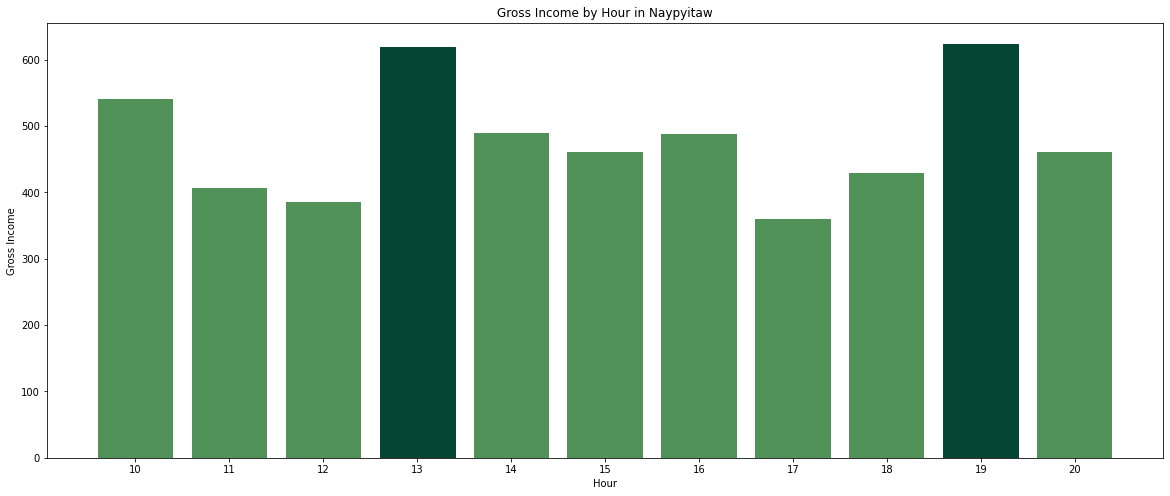

In [21]:
plt.figure(figsize=(20, 8))
ax = plt.bar(sales[sales.city == 'Naypyitaw'].groupby(sales.datetime.dt.hour).gross_income.sum().index, sales[sales.city == 'Naypyitaw'].groupby(sales.datetime.dt.hour).gross_income.sum(), color='#519259')
ax[3].set_color('#064635')
ax[9].set_color('#064635')
plt.title('Gross Income by Hour in Naypyitaw')
plt.xlabel('Hour')
plt.xticks(sales.datetime.dt.hour.unique())
plt.ylabel('Gross Income')
plt.show()

Pendapatan supermarket di kota Naypwitaw paling tinggi berada pada **jam 13** dan **jam 19**, hal ini bisa terjadi karena mungkin pada jam-jam tersebut dekat dengan jam makan siang dan jam makan malam yang menyebabkan banyak orang yang berbelanja ke supermarket.

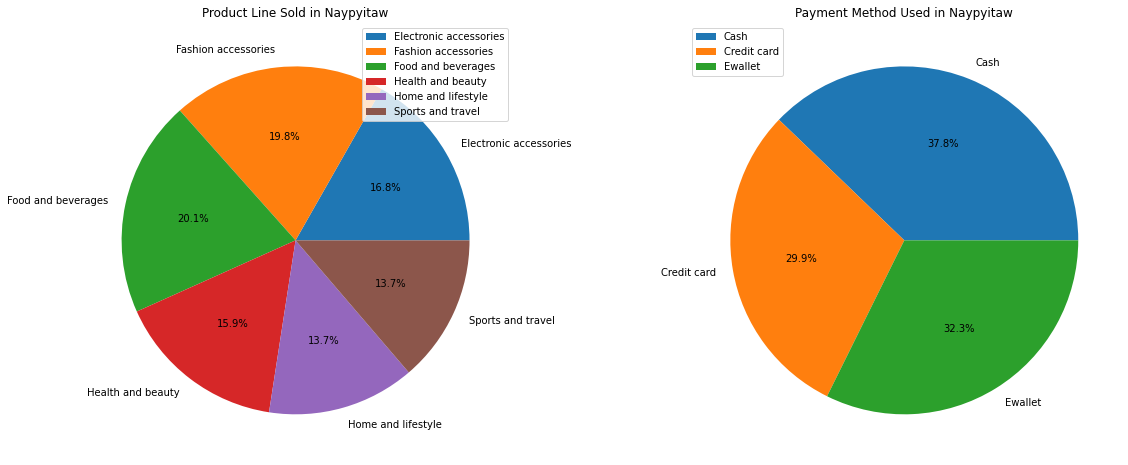

In [22]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie(sales[sales.city == 'Naypyitaw'].groupby('product_line').size(), labels=sales[sales.city == 'Naypyitaw'].groupby('product_line').size().index, autopct='%1.1f%%')
plt.title('Product Line Sold in Naypyitaw')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.pie(sales[sales.city == 'Naypyitaw'].groupby('payment').size(), labels=sales[sales.city == 'Naypyitaw'].groupby('payment').size().index, autopct='%1.1f%%')
plt.title('Payment Method Used in Naypyitaw')
plt.legend(loc='upper left')
plt.show()

In [23]:
sales[sales.city == 'Naypyitaw'].groupby('product_line').gross_income.sum().sort_values(ascending=False)

product_line
Food and beverages        1131.7550
Fashion accessories       1026.6700
Electronic accessories     903.2845
Health and beauty          791.2060
Sports and travel          750.5680
Home and lifestyle         661.6930
Name: gross_income, dtype: float64

Di Naypyitaw produk yang paling banyak dibeli adalah produk berkategori **Fashion & Accessories** dan **Food & Beverages** yang menyumbang pendapatan sebesar **$2157** dan metode pembayaran yang paling banyak digunakan adalah **Cash**.

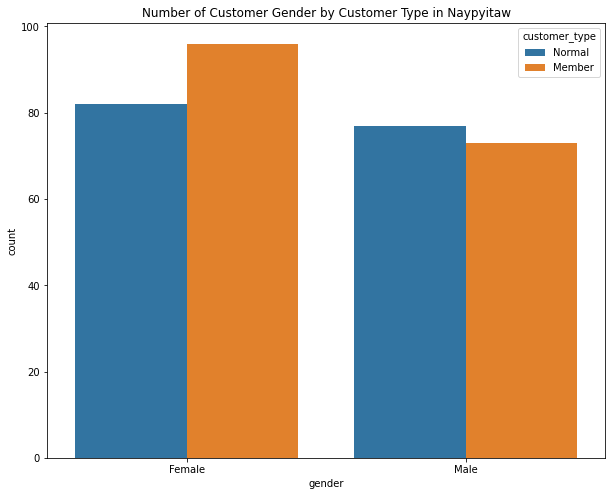

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(x='gender', hue='customer_type', data=sales[sales.city == 'Naypyitaw'])
plt.title('Number of Customer Gender by Customer Type in Naypyitaw')
plt.show()

Pengunjung supermarket di Naypyitaw paling banyak adalah **wanita**, diketahui juga **pengunjung wanita lebih banyak menjadi member** supermarket dibandingkan dengan pengunjung pria.

## Hypothesis Testing

Pada bagian ini akan dilakukan uji hipotesis untuk mengetahui **apakah rata-rata pendapatan kotor dari kota dengan pendapat kotor paling besar memiliki perbedaan signifikan dengan kota dengan pendapatan kotor paling kecil** menggunakan two sample t-test dengan significant threshold sebesar 0.05.

Karena kota **Naypyitaw** adalah kota dengan pendapatan kotor paling besar dan kota **Yangon** adalah kota dengan pendapatan kotor paling kecil, maka:
- Null Hypothesis (**H0**): μNaypyitaw = μYangon (Perbedaan rata-rata pendapatan Naypyitaw dan Yangon **tidak signifikan**)
- Alternative Hypothesis (**H1**): μNaypyitaw != μYangon (Perbedaan rata-rata pendapatan Naypyitaw dan Yangon **signifikan**)

In [25]:
significant_threshold = 0.05

Menghitung total pendapatan kotor dari kota **Naypyitaw** dan kota **Yangon**.

In [26]:
naypyitaw_income = sales[sales.city == 'Naypyitaw'].groupby(sales.datetime.dt.date).gross_income.sum()
yangon_income = sales[sales.city == 'Yangon'].groupby(sales.datetime.dt.date).gross_income.sum()

In [27]:
print(f'Naypyitaw average income ${round(naypyitaw_income.mean())}')
print(f'Yangon average income ${round(yangon_income.mean())}')

Naypyitaw average income $60
Yangon average income $57


Rata-rata pendapatan kota Naypyitaw sekitar **$60** (Enam Puluh US Dollar) sedangkan kota Yangon **$57** (Lima Puluh Tujuh US Dollar).

Selanjutnya melakukan uji hipotesis two sampel t-test dengan menggunakan fungsi `ttest_ind()` dari `scipy.stats`.

In [28]:
tstat, pvalue = stats.ttest_ind(naypyitaw_income, yangon_income)

In [29]:
print(f'P-value {pvalue:.2f}')
print(f'T-stat {tstat:.2f}')
if pvalue <= significant_threshold:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P-value 0.58
T-stat 0.56
Fail to reject the null hypothesis


Dari hasil uji hipotesis ini didapatkan p-value sebesar 0.58 yang mana lebih besar dari significant thresholdnya yaitu 0.05, jadi pada uji hipotesis ini **gagal menolak H0** maka disimpulkan bahwa perbedaan rata-rata pendapatan kotor kota Naypyitaw dan kota Yangon **tidak signifikan**.

### Hypothesis Testing Plot

Membuat populasi dari kota **Naypyitaw** dan kota **Yangon** sebanyak **1000** baris data.

In [30]:
naypyitaw_population = np.random.normal(naypyitaw_income.mean(), naypyitaw_income.std(), 1000)
yangon_population = np.random.normal(yangon_income.mean(), yangon_income.std(), 1000)

Menghitung **Confidence Interval**.

In [31]:
ci = stats.norm.interval(0.95, loc=naypyitaw_income.mean(), scale=naypyitaw_income.std())

Melakukan plotting dari populasi kota **Naypyitaw** dan kota **Yangon**.

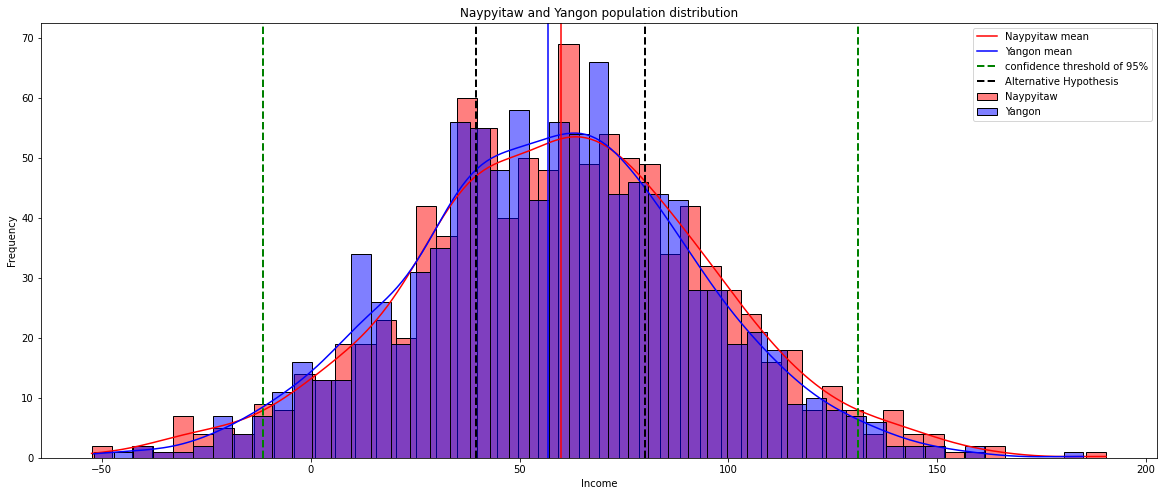

In [32]:
plt.figure(figsize=(20, 8))
sns.histplot(naypyitaw_population, bins=50, label='Naypyitaw', color='red', kde=True)
sns.histplot(yangon_population, bins=50, label='Yangon', color='blue', kde=True)
plt.axvline(x=naypyitaw_income.mean(), color='red', label='Naypyitaw mean')
plt.axvline(x=yangon_income.mean(), color='blue', label='Yangon mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(naypyitaw_population.mean()+tstat*naypyitaw_population.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(naypyitaw_population.mean()-tstat*naypyitaw_population.std(), color='black', linestyle='dashed', linewidth=2)
plt.title('Naypyitaw and Yangon population distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Conclusion

Kesimpulan yang dapat ditarik dari hasil data exploration ini adalah:

**1. Mencari tahu kota manakah yang memiliki total pendapatan kotor paling besar.**

Pada dataset yang digunakan supermarket ini memiliki **3** cabang yang terletak pada kota berbeda yaitu kota **Mandalay**, **Naypyitaw**, dan **Yangon**. Dari hasil eksplorasi data ini dapat diketahui bahwa kota **Naypyitaw adalah kota dengan pendapatan terbesar** baik secara total maupun rata-rata pendapatannya, sedangkan kota **Yangon adalah kota dengan pendapatan paling kecil** berdasarkan rata-rata pendapatannya.

Jadi, kota yang memiliki total pendapatan kotor paling besar adalah kota **Naypyitaw**.

Selama 3 bulan ini dapat diketahui juga beberapa fakta yang ditemukan tentang kota Naypyitaw, diantaranya adalah:

  - Jumlah invoice ada sebanyak **328 invoice** dengan **1831 item** yang terjual dan total pembelian sebesar **$110.569**
  - Total pendapatan kotor supermarket di Naypyitaw sebesar **$5.265**
  - Pendapatan rata-rata tertinggi berada pada **akhir bulan maret** dengan total pendapatan tertinggi ada pada sekitar **jam 13** dan **jam 19**.
  - Produk berkategori **Food & Beverages** dan **Fashion & Accessories** adalah produk yang paling sering dibeli dan metode pembayaran yang paling sering digunakan adalah **Cash**.
  - Kebanyakan dari pengunjung supermarket adalah **wanita**, **pengunjung wanita juga paling banyak menjadi member supermarket** ketimbang pengunjung pria.
  - Rata-rata **rating** yang diberikan pengunjung untuk produk yang dibeli adalah sekitar **7.07/10**

**2. Melakukan uji hipotesis untuk mengetahui apakah rata-rata pendapatan kotor dari kota dengan pendapat kotor paling besar memiliki perbedaan signifikan dengan kota dengan pendapatan kotor paling kecil.**

Karena kota **Naypyitaw** adalah kota dengan pendapatan kotor paling besar dan kota **Yangon** adalah kota dengan pendapatan kotor paling kecil, maka:

  - Null Hypothesis (**H0**): μNaypyitaw = μYangon (Perbedaan rata-rata pendapatan Naypyitaw dan Yangon **tidak signifikan**)
  - Alternative Hypothesis (**H1**): μNaypyitaw != μYangon (Perbedaan rata-rata pendapatan Naypyitaw dan Yangon **signifikan**)

Dari hasil uji hipotesis menggunakan **two sampe t-test** dengan significant threshold sebesar 0.05 **p-value yang didapatkan adalah 0.58**, karena p-value lebih besar dari significant threshold maka pada uji hipotesis ini **gagal menolak H0**.

Jadi dapat disimpulkan bahwa perbedaan rata-rata pendapatan kotor kota Naypyitaw dengan kota Yangon **tidak signifikan**.